R-hat = 1.0010


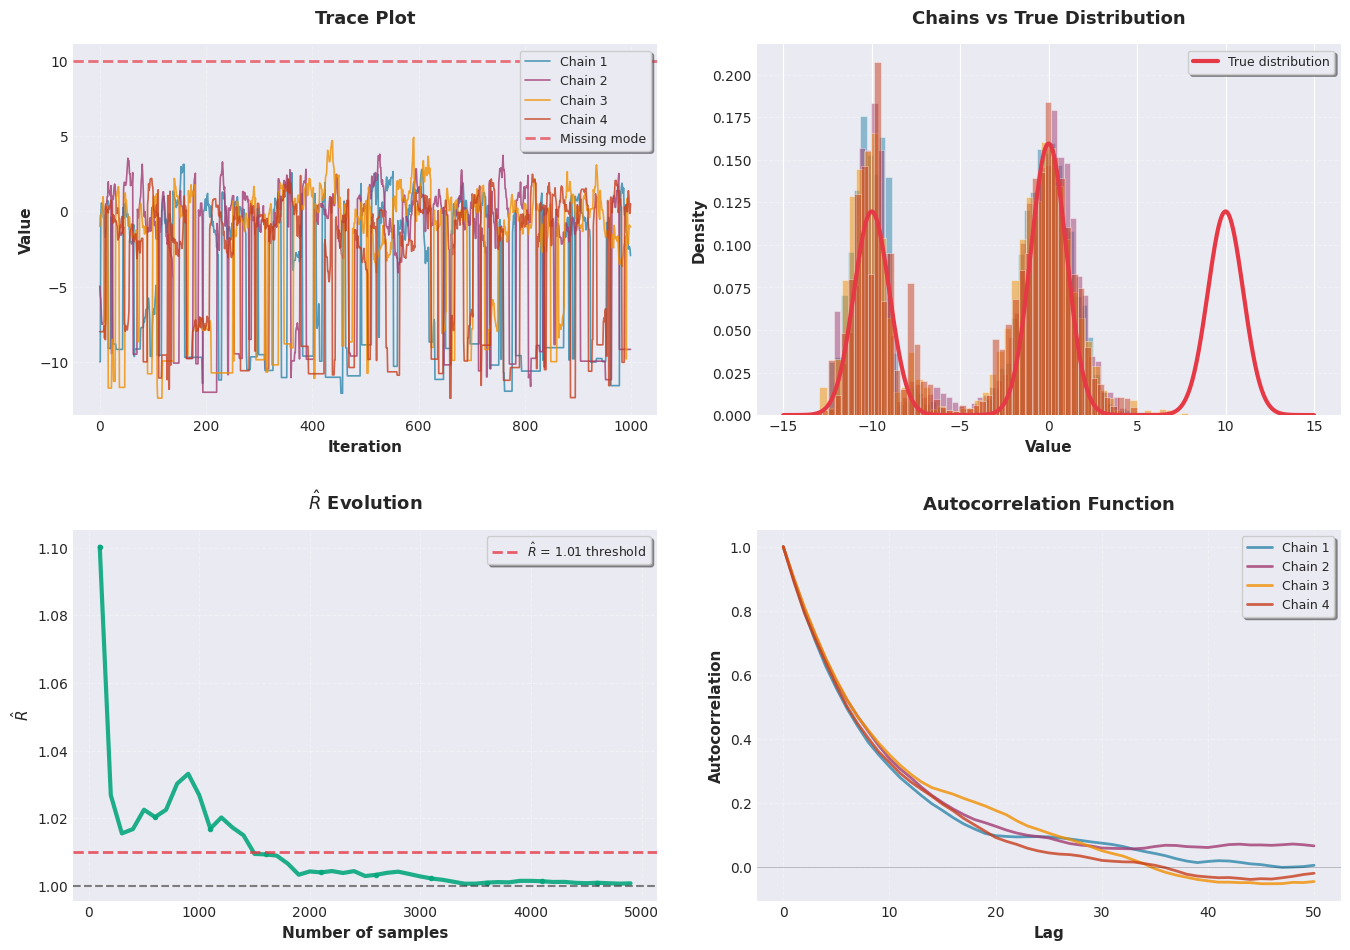

In [ ]:
def plot_swap_dynamics(chains, swap_accepts, temps):
    """Visualize chain swapping dynamics"""
    # Create figure with subplots using add_subplot to avoid confusion
    fig = plt.figure(figsize=(14, 5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    
    # Swap history
    if swap_accepts:
        swap_times = [s<source_id data="0" title="parallel_tempering.pdf" /> for s in swap_accepts]
        swap_chains = [(s[1] + s[2]) / 2 for s in swap_accepts]  # Mid-point between swapped chains
        ax1.scatter(swap_times, swap_chains, alpha=0.5, s=10, c='red')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Chain pair index')
    ax1.set_title('Successful Swaps')
    ax1.set_ylim(-0.5, len(temps) - 1.5)
    ax1.grid(True, alpha=0.3)
    
    # Temperature vs variance
    variances = [np.var(chains[:, i]) for i in range(len(temps))]
    ax2.plot(temps, variances, 'o-', color='purple', linewidth=2, markersize=8)
    ax2.set_xlabel('Temperature')
    ax2.set_ylabel('Chain Variance')
    ax2.set_title('Temperature Effect on Chain Variance')
    ax2.set_xscale('log')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    return fig

In [24]:
# # Example of metastable states that fool R-hat
# def metastable_sampler(start, n_samples):
#     """Sampler that gets stuck in metastable states"""
#     samples = []
#     current = start
#     state = "stable"  # Two modes: 'stable' (stuck) or 'jumping'
#     counter = 0

#     for i in range(n_samples):
#         if state == "stable":
#             # STUCK PHASE: Chain is trapped, only making tiny local moves
#             current = current * 0.99 + np.random.normal(0, 0.1)
#             # This creates a slow drift toward 0 with small noise
#             # The chain is essentially "frozen" in place

#             counter += 1

#             # Occasionally escape (exponential waiting time, mean=500 steps)
#             if counter > np.random.exponential(500):
#                 state = "jumping"
#                 counter = 0

#         else:  # state == 'jumping'
#             # JUMP PHASE: Suddenly teleport to a completely different region
#             current = np.random.choice([-5, 0, 5]) + np.random.normal(0, 1)
#             # Jumps to one of three locations: around -5, 0, or 5
#             state = "stable"  # Immediately get stuck again

#         samples.append(current)

#     return np.array(samples)


# # All chains exhibit same metastable behavior
# chains_meta = []
# for start in [-5, 0, 5, -2]:
#     chain = metastable_sampler(start, 5000)
#     chains_meta.append(chain)

# chains_meta = np.array(chains_meta)
# r_hat_meta = gelman_rubin(chains_meta)

# print(f"Metastable R-hat = {r_hat_meta:.4f}")  # Can be < 1.1 despite poor mixing

# plt.figure(figsize=(12, 4))
# plt.subplot(1, 2, 1)
# for chain in chains_meta:
#     plt.plot(chain[:1000], alpha=0.5, linewidth=0.5)
# plt.title(f"Metastable States (R̂ = {r_hat_meta:.3f})")
# plt.xlabel("Iteration")
# plt.ylabel("Value")

# plt.subplot(1, 2, 2)
# for chain in chains_meta:
#     plt.hist(chain, bins=50, alpha=0.3)
# plt.title("Poor Mixing Despite Low R-hat")
# plt.xlabel("Value")
# plt.ylabel("Count")
# plt.tight_layout()
# plt.show()

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt

# np.random.seed(42)


# def metastable_sampler_annotated(start, n_samples):
#     """Enhanced version that tracks states"""
#     samples = []
#     states = []  # Track when we're stuck vs jumping
#     current = start
#     state = "stable"
#     counter = 0

#     for i in range(n_samples):
#         if state == "stable":
#             current = current * 0.99 + np.random.normal(0, 0.1)
#             counter += 1
#             states.append(0)  # 0 = stuck

#             if counter > np.random.exponential(500):
#                 state = "jumping"
#                 counter = 0
#         else:
#             current = np.random.choice([-5, 0, 5]) + np.random.normal(0, 1)
#             state = "stable"
#             states.append(1)  # 1 = jumping

#         samples.append(current)

#     return np.array(samples), np.array(states)


# # Generate one chain to examine closely
# chain, states = metastable_sampler_annotated(0, 5000)

# # Visualization
# fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# # Panel 1: Trace plot with colored regions
# ax = axes[0]
# ax.plot(chain, "b-", linewidth=0.5, alpha=0.7)
# # Highlight jump points
# jump_indices = np.where(states == 1)[0]
# ax.scatter(jump_indices, chain[jump_indices], c="red", s=20, zorder=5, label="Jumps")
# ax.set_ylabel("Value")
# ax.set_title("Trace Plot: Notice Long Periods of Being Stuck")
# ax.legend()
# ax.grid(True, alpha=0.3)

# # Panel 2: Zoomed in view
# ax = axes[1]
# zoom_start, zoom_end = 1000, 1500
# ax.plot(range(zoom_start, zoom_end), chain[zoom_start:zoom_end], "b-", linewidth=1)
# ax.scatter(
#     [i for i in range(zoom_start, zoom_end) if states[i] == 1],
#     [chain[i] for i in range(zoom_start, zoom_end) if states[i] == 1],
#     c="red",
#     s=50,
#     zorder=5,
# )
# ax.set_ylabel("Value")
# ax.set_title(f"Zoomed View (iterations {zoom_start}-{zoom_end}): Stuck with Rare Jumps")
# ax.grid(True, alpha=0.3)

# # Panel 3: State indicator
# ax = axes[2]
# ax.plot(states[:2000], "g-", linewidth=0.5)
# ax.fill_between(range(2000), states[:2000], alpha=0.3)
# ax.set_ylabel("State")
# ax.set_xlabel("Iteration")
# ax.set_title("State Indicator: 0=Stuck (most of the time), 1=Jumping (rare)")
# ax.set_yticks([0, 1])
# ax.set_yticklabels(["Stuck", "Jumping"])
# ax.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Show statistics
# stuck_proportion = (states == 0).mean()
# print(f"Proportion of time stuck: {stuck_proportion:.1%}")
# print(f"Average consecutive stuck steps: ~500")
# print(f"Number of jumps in 5000 steps: {(states == 1).sum()}")

In [26]:
# def gelman_rubin(chains):
#     m, n = chains.shape
#     W = np.mean([np.var(chain, ddof=1) for chain in chains])
#     chain_means = [np.mean(chain) for chain in chains]
#     B = n * np.var(chain_means, ddof=1)
#     var_est = ((n - 1) / n) * W + (1 / n) * B
#     return np.sqrt(var_est / W)


# # Generate multiple chains with metastable behavior
# np.random.seed(42)
# n_chains = 4
# n_samples = 5000
# chains = []

# for i in range(n_chains):
#     start = np.random.choice([-5, 0, 5])
#     chain, _ = metastable_sampler_annotated(start, n_samples)
#     chains.append(chain)

# chains = np.array(chains)

# # Calculate diagnostics
# r_hat = gelman_rubin(chains)

# # Why does R-hat look good?
# print(f"R-hat = {r_hat:.4f}")
# print("\nWhy R-hat is fooled:")
# print(f"1. Within-chain variance W: {np.mean([np.var(c) for c in chains]):.2f}")
# print(f"2. Between-chain variance B/n: {np.var([np.mean(c) for c in chains]):.2f}")
# print(f"3. Chain means: {[f'{np.mean(c):.2f}' for c in chains]}")
# print(f"4. Chain stds: {[f'{np.std(c):.2f}' for c in chains]}")

In [27]:
# # Let's demonstrate WHY this fools R-hat
# fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# # All chains visit the same regions...
# ax = axes[0, 0]
# for i, chain in enumerate(chains):
#     ax.hist(chain, bins=50, alpha=0.3, label=f'Chain {i+1}', density=True)
# ax.set_xlabel('Value')
# ax.set_ylabel('Density')
# ax.set_title('All Chains Visit Same Three Regions')
# ax.legend()

# # ...and have similar means and variances
# ax = axes[0, 1]
# chain_means = [np.mean(chain) for chain in chains]
# chain_vars = [np.var(chain) for chain in chains]
# x = np.arange(len(chains))
# ax.bar(x - 0.2, chain_means, 0.4, label='Means', alpha=0.7)
# ax.bar(x + 0.2, chain_vars, 0.4, label='Variances', alpha=0.7)
# ax.set_xlabel('Chain')
# ax.set_ylabel('Value')
# ax.set_title('Similar Statistics Across Chains')
# ax.legend()
# ax.set_xticks(x)
# ax.set_xticklabels([f'Chain {i+1}' for i in range(len(chains))])

# # BUT they're not actually mixing well!
# ax = axes[1, 0]
# for chain in chains:
#     ax.plot(chain[:1000], alpha=0.5, linewidth=0.5)
# ax.set_xlabel('Iteration')
# ax.set_ylabel('Value')
# ax.set_title('Poor Mixing: Long Periods Stuck')

# # Autocorrelation reveals the problem
# ax = axes[1, 1]
# from statsmodels.tsa.stattools import acf
# for i, chain in enumerate(chains):
#     autocorr = acf(chain, nlags=100, fft=True)
#     ax.plot(autocorr, alpha=0.7, label=f'Chain {i+1}')
# ax.axhline(y=0, color='black', linestyle='--', alpha=0.3)
# ax.set_xlabel('Lag')
# ax.set_ylabel('Autocorrelation')
# ax.set_title('Very High Autocorrelation = Poor Mixing')
# ax.legend()

# plt.tight_layout()
# plt.show()